In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [16]:
# Number of nodes
n: int = 30
# Probability of edge creation
p: float = 0.1
# Number of neighbors in the small-world graph
k: int = 4
# Number of edges to add for each new node in the scale-free graph
m: int = 2

graph_random = nx.erdos_renyi_graph(n, p)
graph_small_world = nx.watts_strogatz_graph(n, k, p)
graph_scale_free = nx.barabasi_albert_graph(n, m)

In [17]:
graph = graph_random

degrees = [d for _, d in graph.degree()]
avg_degree = np.mean(degrees)
clustering_coefficient = nx.average_clustering(graph)

if nx.is_connected(graph):
    avg_shortest_path = nx.average_shortest_path_length(graph)
else:
    avg_shortest_path = np.inf

centrality = nx.degree_centrality(graph)

dict_metrics = {
    "degrees": degrees,
    "centrality": centrality,
    "average_degree": avg_degree,
    "clustering_coefficient": clustering_coefficient,
    "average_shortest_path": avg_shortest_path,
}

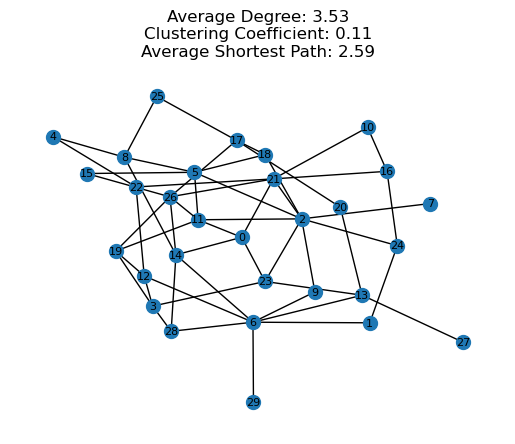

In [18]:
fig, ax = plt.subplots()

# Draw the network
nx.draw(graph, ax=ax, with_labels=True, node_size=100, font_size=8)
# Add some metrics to the plot
ax.set_title(
    f"Average Degree: {dict_metrics['average_degree']:.2f}\n"
    f"Clustering Coefficient: {dict_metrics['clustering_coefficient']:.2f}\n"
    f"Average Shortest Path: {dict_metrics['average_shortest_path']:.2f}"
)

plt.show()
plt.close()